In [30]:
# BAYESIAN ESTIMATION ASSIGNMENT
# CREATED BY - Aditya Vyas, Vedant Choudhary
library(Rlab)
library(actuar)
library(tidyverse)
par(mfrow = c(2,1))

## Binomial Distribution

[1] "The parameters of the posterior beta distribution are:"
[1] 600 402


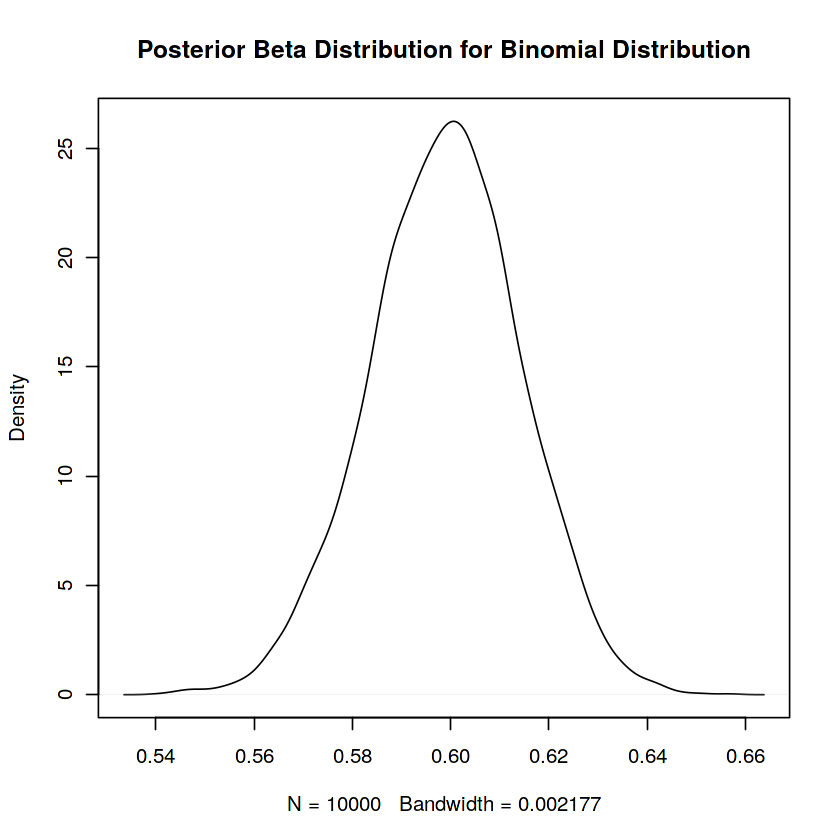

In [31]:
sample <- rbinom(n = 1000, size = 1, prob = 0.6)
    
# Assuming alpha and beta for the prior distribution to be 1
prior_alpha <- 1
prior_beta <- 1
r <- 1

# Getting the posterior distribution parameters
posterior_alpha <- prior_alpha + sum(sample)
posterior_beta <- prior_beta + r*length(sample) - sum(sample)
print("The parameters of the posterior beta distribution are:")
print(c(posterior_alpha, posterior_beta))

posterior_distribution_sample <- rbeta(n = 10000, shape1 = posterior_alpha, 
                                       shape2 = posterior_beta)
plot(density(posterior_distribution_sample), main = "Posterior Beta 
                                    Distribution for Binomial Distribution")

## Poisson Distribution

[1] "The parameters of the posterior gamma distribution are:"
[1] 4.88300e+03 9.99001e-04


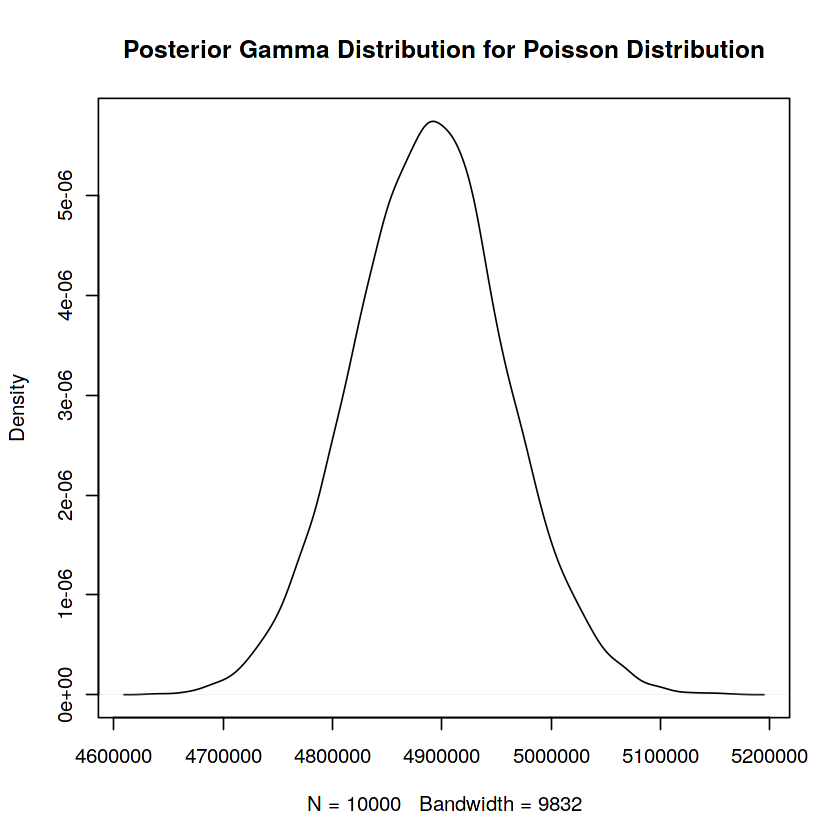

In [32]:
sample <- rpois(n = 1000, lambda = 5)

# Assuming alpha and beta for the prior distribution to be 1
prior_alpha <- 1
prior_beta <- 1

# Getting the posterior distribution parameters
posterior_alpha <- prior_alpha + sum(sample)
posterior_beta <- 1/(1/prior_beta + length(sample))
print("The parameters of the posterior gamma distribution are:")
print(c(posterior_alpha, posterior_beta))

posterior_distribution_sample <- rgamma(n = 10000, posterior_alpha, posterior_beta)
plot(density(posterior_distribution_sample), main = "Posterior Gamma Distribution 
                                                        for Poisson Distribution")

## Uniform Distribution

[1] "The parameters of the posterior pareto distribution are:"
[1]    9.993898 1001.000000


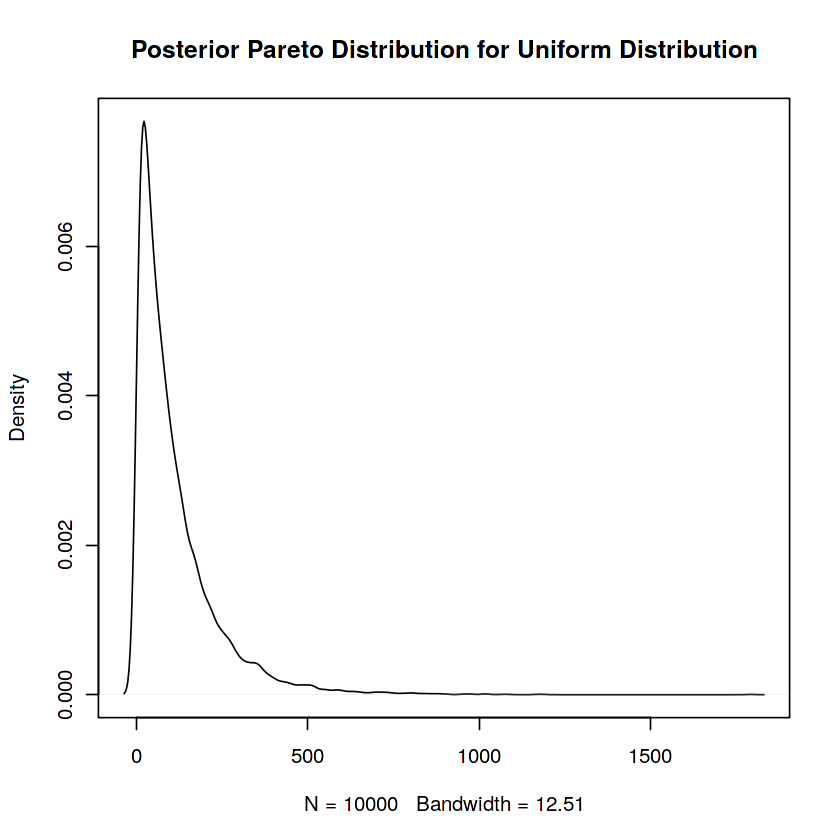

In [33]:
sample <- runif(n = 1000, min = 0, max = 10)

# Assuming alpha and beta for the prior distribution to be 1
prior_w0 <- 1
prior_alpha <- 1

# Getting the posterior distribution parameters
posterior_w0 <- max(c(prior_w0, sample))
posterior_alpha <- prior_alpha + length(sample)
print("The parameters of the posterior pareto distribution are:")
print(c(posterior_w0, posterior_alpha))

posterior_distribution_sample <- rpareto(n = 10000, posterior_w0, posterior_alpha)
plot(density(posterior_distribution_sample), main = "Posterior Pareto Distribution 
                                                        for Uniform Distribution")

## Normal Distribution

In [ ]:
sample <- rnorm(n = 1000, mean = 10, sd = 20)

# Assuming alpha and beta for the prior distribution to be 1
r <- 1
tau <- 5
mu <- 4
prior_alpha <- 1
prior_beta <- 2

# Getting the posterior distribution parameters
M_conditional_distribution_mu <- (tau*mu + length(sample)*mean(sample))
                                                /(tau + length(sample))
M_conditional_distribution_precision <- (tau + length(sample))*r
print("The parameters of the conditional posterior normal distribution 
                                                of M when R = r is:")
print(c(M_conditional_distribution_mu, 
        M_conditional_distribution_precision))

R_marginal_distribution_alpha <- prior_alpha + length(sample)/2
R_marginal_distribution_beta <- 1/(1/prior_beta + 
                                1/2*(sum((sample - mean(sample))**2))) 
                                + tau*length(sample)*
                                ((mean(sample) - mu)**2)
                                /2*(tau + length(sample))
print("The parameters of the marginal posterior gamma distribution of 
                                                                R is:")
print(c(R_marginal_distribution_alpha, R_marginal_distribution_beta))

# Generate the distibutions
conditional_joint_distribution_of_M <- rnorm(n = 10000, 
                            mean = M_conditional_distribution_mu, 
                            1/sqrt(M_conditional_distribution_precision))
marginal_joint_distribution_of_R <- rgamma(n = 10000, 
                                        R_marginal_distribution_alpha, 
                                        R_marginal_distribution_beta)

plot(density(conditional_joint_distribution_of_M), 
     main = "Conditional Joint Probability Distribution for Mean M")
plot(density(marginal_joint_distribution_of_R), 
     main = "Marginal Joint Probability Distribution for Precision R")

[1] "The parameters of the conditional posterior normal distribution of M when R = r is:"
[1]    9.88799 1005.00000
[1] "The parameters of the marginal posterior gamma distribution of R is:"
[1]      501 87977656


## Exponential Distribution

[1] "The parameters of the posterior gamma distribution are:"
[1] 1.001000e+03 1.005551e-02


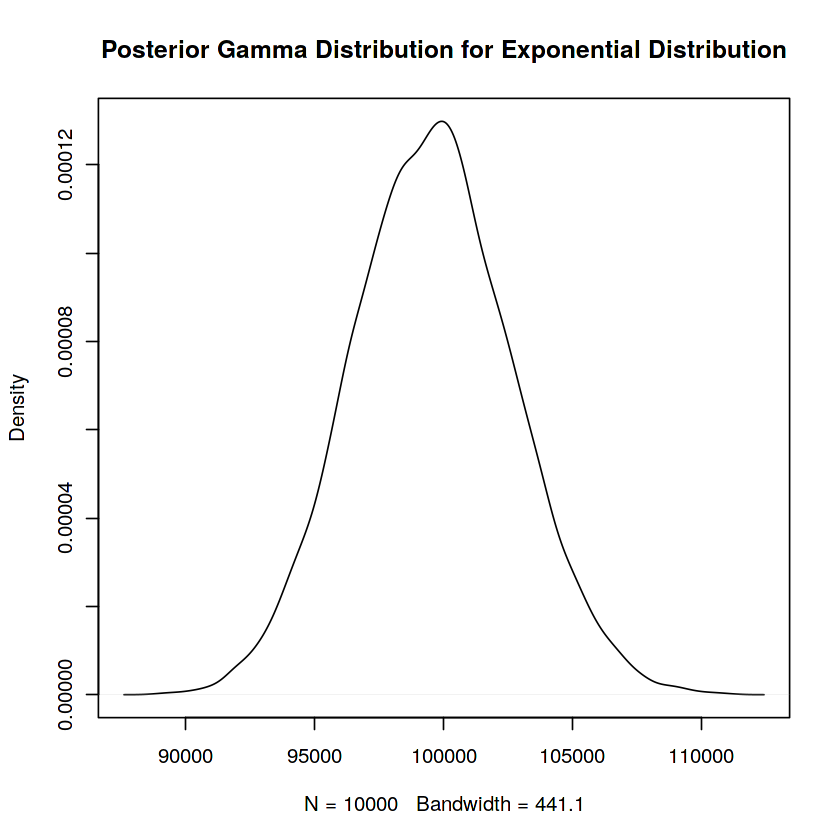

In [36]:
sample <- rexp(n = 1000, rate = 10)

# Assuming alpha and beta for the prior distribution to be 1
prior_alpha <- 1
prior_beta <- 1

# Getting the posterior distribution parameters
posterior_alpha <- prior_alpha + length(sample)
posterior_beta <- 1/(1/prior_beta + sum(sample))
print("The parameters of the posterior gamma distribution are:")
print(c(posterior_alpha, posterior_beta))

posterior_distribution_sample <- rgamma(n = 10000, posterior_alpha, posterior_beta)
plot(density(posterior_distribution_sample), main = "Posterior Gamma Distribution 
                                                    for Exponential Distribution")